In [32]:
import numpy as np
import matplotlib.pyplot as plt

from mppi import Utilities as U, Parsers as P

# Analysis of the FT of the pump

### Test : FT of a sine

To test the procedure for the FT and the definition of the proper frequency, we consider a simple sine function

In [3]:
T = 100 # lenght of the time interval
dt = 0.1 # resolution of time sampling
N = int(T/dt) # number of sampled points
print('number of samplings',N)

number of samplings 1000


In [5]:
time = np.linspace(0,T,N)

In [6]:
nu = 0.5

In [7]:
signal = np.sin(2.*np.pi*nu*time)

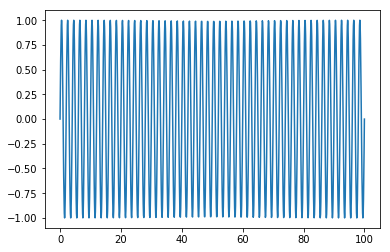

In [8]:
plt.plot(time,signal)

The resolution in frequency space is given by $1/T$ and the frequency variable
ranges from $-N/(2T)$ to $N/(2T)$.

In [9]:
freqs = np.fft.fftfreq(N, d=dt)

In [10]:
print('frequency resolution',freqs[1]-freqs[0])
print('max frequency',freqs.max())
print('min frequency',freqs.min())

frequency resolution 0.01
max frequency 4.99
min frequency -5.0


In [11]:
fourier = np.fft.fft(signal)

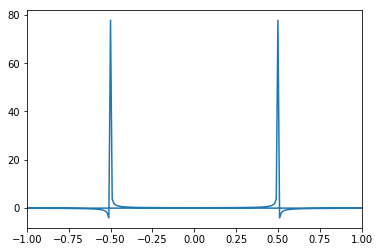

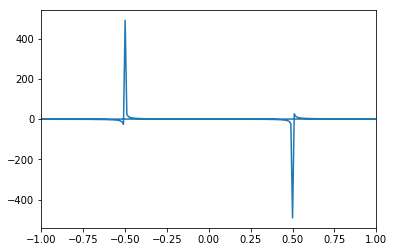

In [13]:
#plt.plot(freq,fourier.real**2+fourier.imag**2)
plt.plot(freqs,fourier.real)
plt.xlim(-1,1)
plt.show()
plt.plot(freqs,fourier.imag)
plt.xlim(-1,1)
plt.show()

We observe that the real part is symmetric in $\nu$ and the imaginary part is antisymmetric,
as expted since the signal is real in time. The peak is at the right frequency

### Test : FT of a Qsin

We perform another analytical test using a Qsin

In [2]:
epump = 1.5 # eV
hplanck = U.Planck_ev_ps*1e3 # Planck constant in ev*fs
nupump = epump/hplanck # in fs^-1

width = 30 # fs
t0 = 3*width

In [3]:
nupump

0.36269838639376023

In [4]:
T = 2000 # lenght of the time interval
dt = 0.01 # resolution of time sampling
N = int(T/dt) # number of sampled points
print('number of samplings',N)

number of samplings 200000


In [5]:
time = np.linspace(0,T,N)

In [6]:
field = np.sin(2.*np.pi*nupump*time)*np.exp(-0.5*((time-t0)/width)**2) 

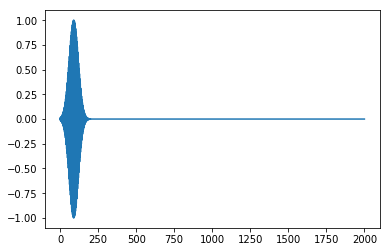

In [7]:
plt.plot(time,field)

In [8]:
freqs = np.fft.fftfreq(N, d=dt)

In [9]:
print('frequency resolution',freqs[1]-freqs[0])
print('max frequency',freqs.max())
print('min frequency',freqs.min())

frequency resolution 0.0005
max frequency 49.9995
min frequency -50.0


In [10]:
fplus = freqs[0:int(N/2)]
fplus

array([0.00000e+00, 5.00000e-04, 1.00000e-03, ..., 4.99985e+01,
       4.99990e+01, 4.99995e+01])

In [21]:
fourier = np.fft.fft(field)
fourierplus = fourier[0:int(N/2)]
fabs = np.sqrt(fourierplus.real**2+fourierplus.imag**2)

In [22]:
fabs.max()

3752.227540607175

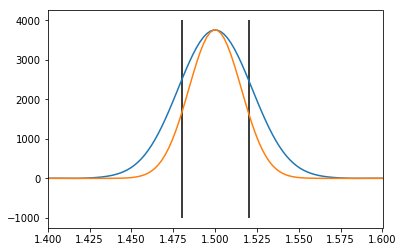

In [30]:
#plt.plot(freq,fourier.real**2+fourier.imag**2)
#plt.plot(hplanck*fplus,fourierplus.real)
#plt.plot(hplanck*fplus,fourierplus.imag)
plt.plot(hplanck*fplus,fabs)
plt.plot(hplanck*fplus,fabs**2/3750)
plt.xlim(epump-0.1,epump+0.1)
spread = 40 # meV
plt.vlines(x=epump-1e-3*spread*0.5,ymin=-1000,ymax=4000)
plt.vlines(x=epump+1.e-3*spread*0.5,ymin=-1000,ymax=4000)
plt.show()

### Analysis of real data

In [50]:
hplanck = U.Planck_ev_ps*1e3 # Planck constant in ev*fs
epump = 1.5 #eV

In [31]:
path_w100 = 'RT_k200/FixSymm/dephase_0.002-freq_1.5-int_1000.0-simTime_20000/'
path_w400 = 'RT_k200/FixSymm/dephase_0.002-freq_1.5-int_1000.0-simTime_20000-width_400/'
path_w1000 = 'RT_k200/FixSymm/dephase_0.002-freq_1.5-int_1000.0-simTime_20000-width_1000/'

In [33]:
data100 = P.YamboParser.from_path(path_w100)
data400 = P.YamboParser.from_path(path_w400)
data1000 = P.YamboParser.from_path(path_w1000)

In [73]:
time100 = data100['external_field']['time']
Ex100 = data100['external_field']['Ex_Re']
Ey100 = data100['external_field']['Ey_Re']
Int100 = data100['external_field']['Intensity']

time400 = data400['external_field']['time']
Ex400 = data400['external_field']['Ex_Re']
Ey400 = data400['external_field']['Ey_Re']
Int400 = data400['external_field']['Intensity']

time1000 = data1000['external_field']['time']
Ex1000 = data1000['external_field']['Ex_Re']
Ey1000 = data1000['external_field']['Ey_Re']
Int1000 = data1000['external_field']['Intensity']

(0, 2000)

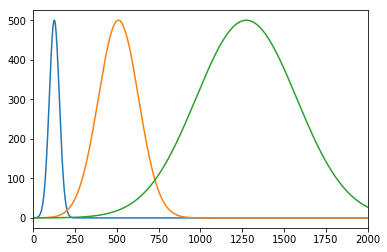

In [75]:
plt.plot(time100,Int100,label=100)
plt.plot(time400,Int400,label=400)
plt.plot(time1000,Int1000,label=1000)
plt.xlim(0,2000)

In [76]:
dt100 = time100[1]-time100[0]
N100 = Int100.size

dt400 = time400[1]-time400[0]
N400 = Int400.size

dt1000 = time1000[1]-time1000[0]
N1000 = Int1000.size

In [78]:
f100 = np.fft.fftfreq(N100, d=dt100)
f100plus = f100[0:int(N100/2)]

f400 = np.fft.fftfreq(N400, d=dt400)
f400plus = f400[0:int(N400/2)]

f1000 = np.fft.fftfreq(N1000, d=dt1000)
f1000plus = f1000[0:int(N1000/2)]

In [85]:
ft100 = np.fft.fft(Ex100)
ft100plus = ft100[0:int(N100/2)]
ft100abs = np.sqrt(ft100plus.real**2+ft100plus.imag**2)

ft400 = np.fft.fft(Ex400)
ft400plus = ft400[0:int(N400/2)]
ft400abs = np.sqrt(ft400plus.real**2+ft400plus.imag**2)

ft1000 = np.fft.fft(Ex1000)
ft1000plus = ft1000[0:int(N1000/2)]
ft1000abs = np.sqrt(ft1000plus.real**2+ft1000plus.imag**2)

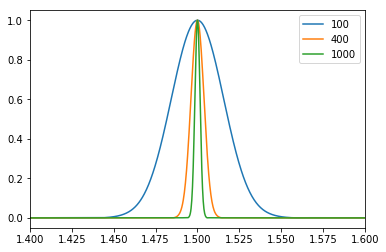

In [86]:
plt.plot(hplanck*f100plus,ft100abs/ft100abs.max(),label=100)
plt.plot(hplanck*f400plus,ft400abs/ft400abs.max(),label=400)
plt.plot(hplanck*f1000plus,ft1000abs/ft1000abs.max(),label=1000)
plt.xlim(epump-0.1,epump+0.1)
plt.legend()